# Real-World Text Analytics Application

### Assignment
- The objective of this assignment is to apply the concepts learned in the Text Analytics module to a realworld problem of your choice. Through this assignment, you will gain practical experience in preprocessing text data, applying various text analytics techniques, and visualizing and interpreting the results.

### Problem statement 
- In today's competitive job market, many individuals face challenges in securing interview opportunities despite applying to numerous positions. One significant hurdle is the automated screening process employed by companies, where AI software filters and selects resumes based on alignment with specific job roles. As a result, candidates may find their resumes discarded before human eyes even review them, leading to missed opportunities and frustration.

### Main objectives
- To address this issue, we aim to develop a solution that empowers job seekers to optimize their resumes effectively. The proposed system will allow users to upload their resumes and receive instant feedback on the suitability of their skills and experience for their desired job roles. By leveraging advanced text analysis techniques, the system will analyze the content of the resume and provide recommendations on job positions that align with the candidate's qualifications.

- Ultimately, this system aims to enable job seekers to refine their resumes iteratively until they receive recommendations matching their target job roles. By providing actionable insights and guidance, the system aims to increase the chances of candidates securing interview opportunities and ultimately landing their desired positions in today's competitive job market.

### Table of content 

1. Exploratory Data Analysis
2. Data pre-processing
3. Data Modeling (with Training/Test Data)
4. Learining the top keywords across resumes.


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

# Set the default figure size
plt.rcParams['figure.figsize'] = [16, 8]  # Adjust the width and height as needed


In [36]:
df = pd.read_csv('../input/resume-dataset/UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


# 1. Exploratory Data Analysis (EDA)

In [37]:
category = df['Category'].value_counts().reset_index()
category

,index,Category
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


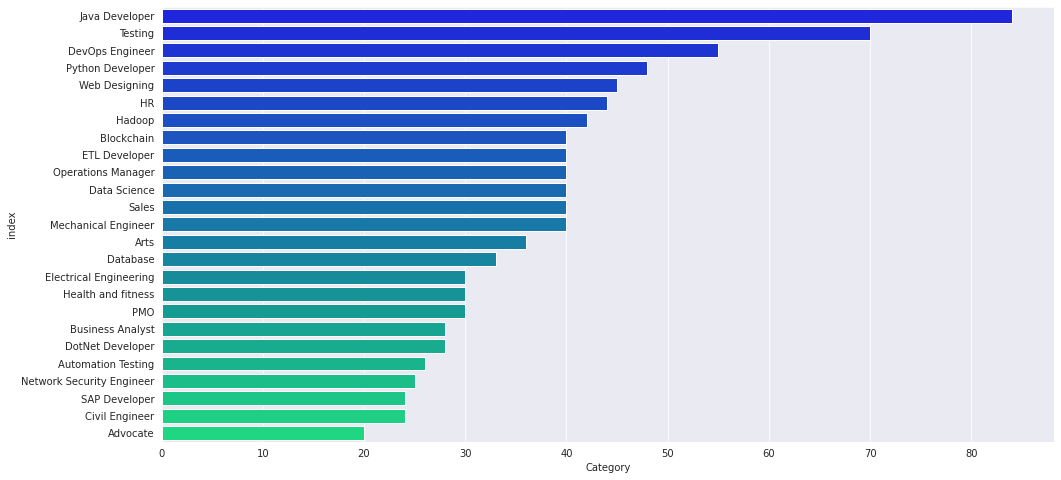

In [38]:

sns.barplot(x=category['Category'], y=category['index'], palette='winter')
plt.show()


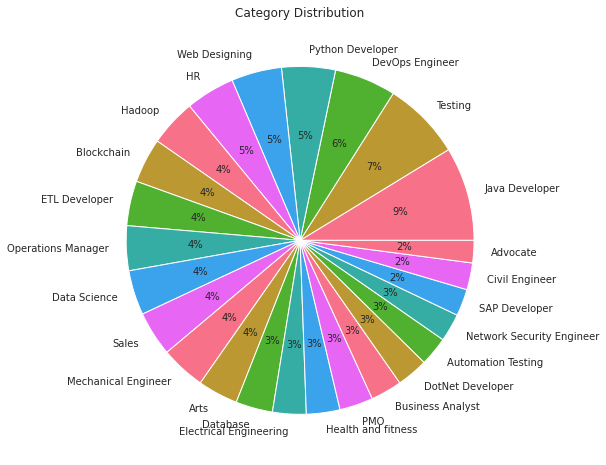

In [39]:
import seaborn as sns

sns.set_palette("husl")  # Using a different palette
plt.pie(category['Category'], labels=category['index'], autopct='%.0f%%')
plt.title('Category Distribution')
plt.show()


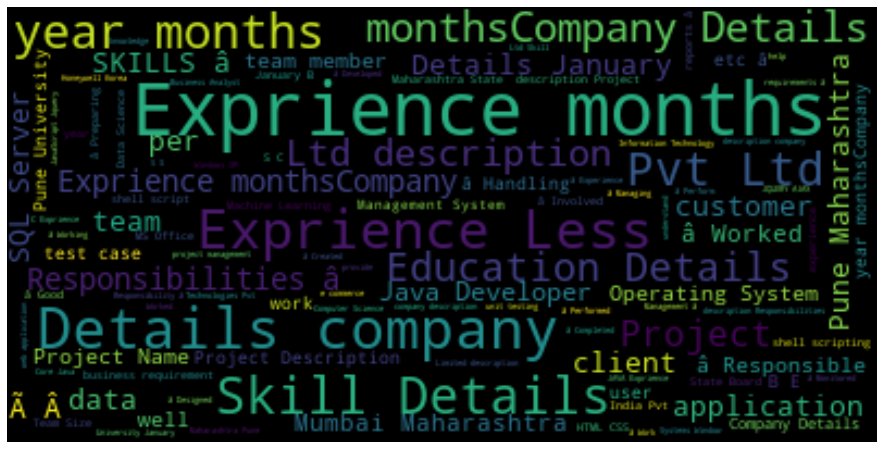

In [40]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

# English stop words from nltk:
SetOfStopWords = set(stopwords.words('english') + ['``', "''"])

totalWords = []

Sentences = df['Resume'].values
cleanedSentences = ""

for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in SetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

# The FreqDist function gives the user the frequency distribution of all the words in the text.
wordfreqdist = nltk.FreqDist(totalWords)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(cleanedSentences)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


#2. Data Pre-processing:
1. Data Cleaning
2. Data Encoding

#### Basic cleaning - Removing punctuation, stop words, and special characters

In [41]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [42]:
df['cleaned version 01'] = df['Resume'].apply(lambda x:cleanResume(x))
df.head()

,Category,Resume,cleaned version 01
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


### Further cleaning 

- Tokenization
- Lowercasing
- Removing punctuation, stop words, and special characters
- Lemmatization or stemming
- Handling missing values and outliers (if applicable)

#### Tokenization & Lowercasing

In [43]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string


# Function to perform preprocessing tasks
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Lowercasing
    tokens = [word.lower() for word in tokens]
    
    # Remove any further punctuation and special characters
    tokens = [word for word in tokens if word.isalnum()]
    
    # Remove and further stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Apply preprocessing to the 'Resume' column
df['cleaned version 02'] = df['Resume'].apply(preprocess_text)



In [44]:
df.head()

,Category,Resume,cleaned version 01,cleaned version 02
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...,education details may 2013 may 2017 data scien...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...,education details mca ymcaust faridabad haryan...


### Lemmatization or stemming


In [45]:
import spacy
# Load English language model
nlp = spacy.load("en_core_web_sm")
def lemmatize_words(text):
# Tokenize the text and lemmatize each token
    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    return lemmatized_text
# Apply lemmatization to the text column
df["cleaned version 03"] = df["cleaned version 02"].apply(lambda text: lemmatize_words(text))
df.head()


,Category,Resume,cleaned version 01,cleaned version 02,cleaned version 03
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...,skills programming languages python pandas num...,skill programming language python panda numpy ...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...,education details may 2013 may 2017 data scien...,education detail may 2013 may 2017 data scient...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,areas interest deep learning control system de...,area interest deep learn control system design...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,skills r python sap hana tableau sap hana sql ...,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...,education details mca ymcaust faridabad haryan...,education details mca ymcaust faridabad haryan...


#### spelling correction

In [46]:
from textblob import TextBlob

# Function to apply spelling correction to a text
def correct_spelling(text):
    blob = TextBlob(text)
    return str(blob.correct())

# Apply spelling correction to the 'cleaned_version_03' column
df['cleaned version 03'] = df['cleaned version 03'].apply(correct_spelling)

#### Data encoding

In [47]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder object
label = LabelEncoder()

# Encode the data and create a map of encoded values to category labels
df['new_Category'] = label.fit_transform(df['Category'])
encoded_to_category = {encoded_num: category_label for encoded_num, category_label in zip(df['new_Category'], df['Category'])}
df.head()

,Category,Resume,cleaned version 01,cleaned version 02,cleaned version 03,new_Category
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...,skills programming languages python pandas num...,skill programming language patron and jump cit...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...,education details may 2013 may 2017 data scien...,education detail may 2013 may 2017 data scient...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,areas interest deep learning control system de...,area interest deep learn control system design...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,skills r python sap hana tableau sap hana sql ...,skill r patron sap hand tableaux sap hand sal ...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...,education details mca ymcaust faridabad haryan...,education details ma ymcaust faridabad havana ...,6


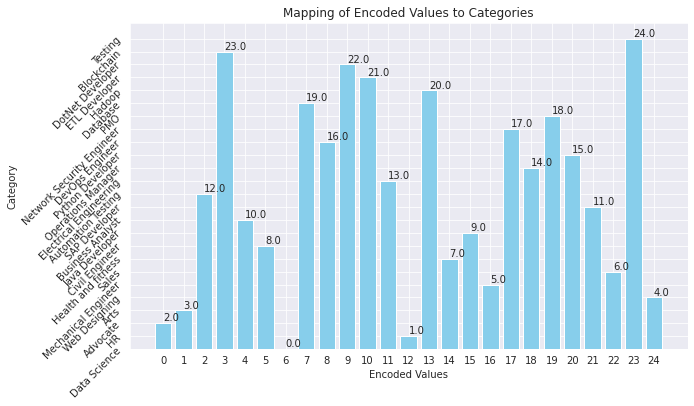

In [48]:
import matplotlib.pyplot as plt

# Plot the mapping of encoded values to categories
plt.figure(figsize=(10, 6))
bars = plt.bar(encoded_to_category.keys(), encoded_to_category.values(), color='skyblue')

# Display the encoded values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.xlabel('Encoded Values')
plt.ylabel('Category')
plt.title('Mapping of Encoded Values to Categories')
plt.xticks(list(encoded_to_category.keys()))
plt.yticks(rotation=45)
plt.show()


In [49]:
# Extracting the three columns
df1 = df.copy()
df = df[['cleaned version 03', 'new_Category']]

(array([ 82.,  68.,  97.,  83.,  70., 116., 124.,  95.,  72., 155.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <BarContainer object of 10 artists>)

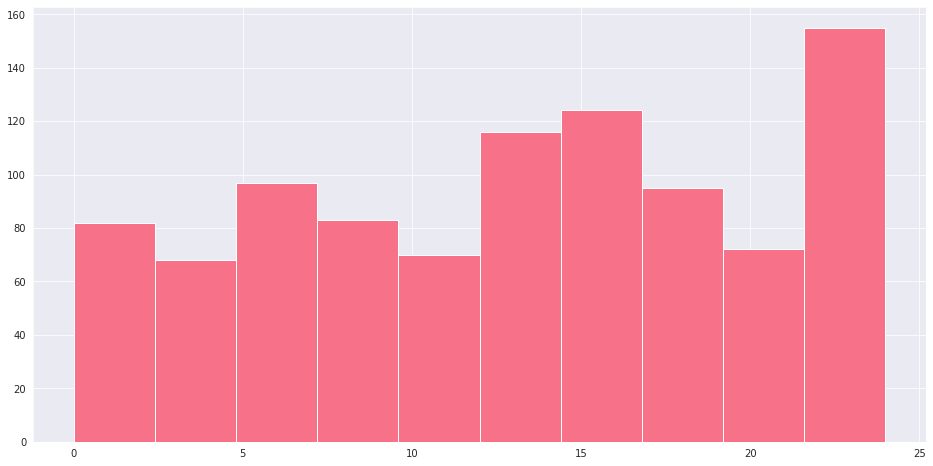

In [50]:
plt.hist(df['new_Category'])

## Model building

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import Adam

# Assuming df is your DataFrame containing 'cleaned version 03' and 'new_Category' columns
# Load your data

# Data preprocessing
X = df['cleaned version 03'].values
y = df['new_Category'].values

# Convert labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Tokenization
max_words = 10000  # Maximum number of words to keep
max_len = 1000  # Maximum length of sequences
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=max_len)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Model architecture
embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32))) # Additional LSTM layer
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Set initial learning rate
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch != 0:
        lr = lr * 0.9  # Reduce learning rate by 10% every 10 epochs
    return lr

lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

# Model training with callbacks
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping, lr_scheduler_callback])

# Model evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/100
20/20 [==============================] - 9s 189ms/step - loss: 3.2011 - accuracy: 0.1073 - val_loss: 3.1679 - val_accuracy: 0.1818
Epoch 2/100
20/20 [==============================] - 2s 124ms/step - loss: 2.9650 - accuracy: 0.1886 - val_loss: 2.8005 - val_accuracy: 0.2013
Epoch 3/100
20/20 [==============================] - 3s 130ms/step - loss: 2.3518 - accuracy: 0.3171 - val_loss: 2.3824 - val_accuracy: 0.3182
Epoch 4/100
20/20 [==============================] - 2s 125ms/step - loss: 1.8824 - accuracy: 0.4569 - val_loss: 1.8567 - val_accuracy: 0.4481
Epoch 5/100
20/20 [==============================] - 3s 128ms/step - loss: 1.4785 - accuracy: 0.5756 - val_loss: 1.4795 - val_accuracy: 0.5519
Epoch 6/100
20/20 [==============================] - 2s 122ms/step - loss: 1.1075 - accuracy: 0.7089 - val_loss: 1.1242 - val_accuracy: 0.7013
Epoch 7/100
20/20 [==============================] - 2s 124ms/step - loss: 0.8632 - accuracy: 0.7919 - val_loss: 0.9237 - val_accuracy: 0.7727

### Model testing 

In [52]:
# Assuming the model is already trained and evaluated

# Test the model using X_test and y_test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


7/7 [==============================] - 0s 59ms/step - loss: 0.2206 - accuracy: 0.9793
Test Loss: 0.2206147164106369
Test Accuracy: 0.9792746305465698


### Model evaluvating

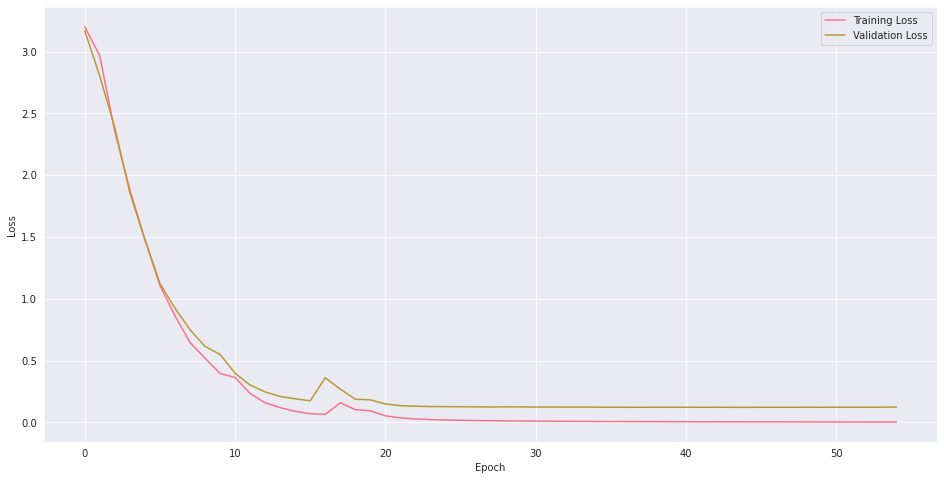

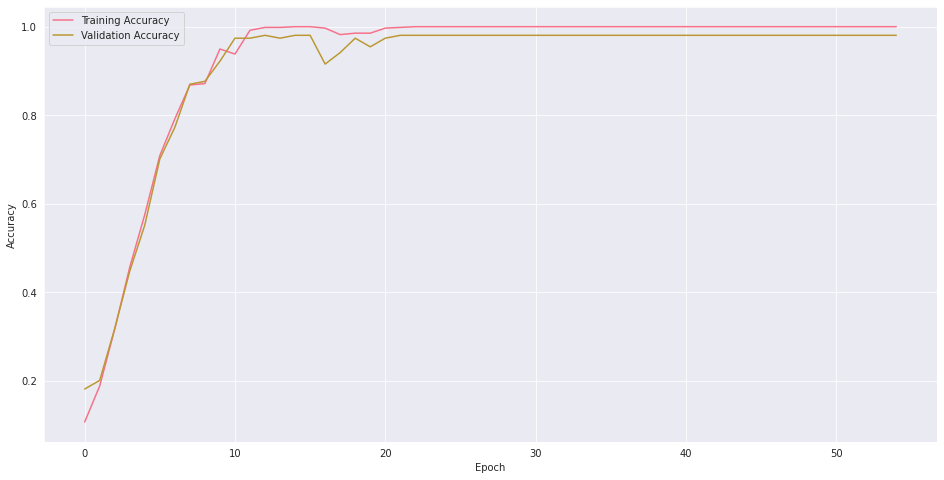

In [53]:
# Save the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [54]:
# Get predicted probabilities for each class
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)


In [55]:

# Generate classification report
report = classification_report(y_test, y_pred)

# Print classification report
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.67      1.00      0.80         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      0.67      0.80         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       0.94      1.00      0.97        15
          16       1.00      1.00      1.00         8
          17       1.00    

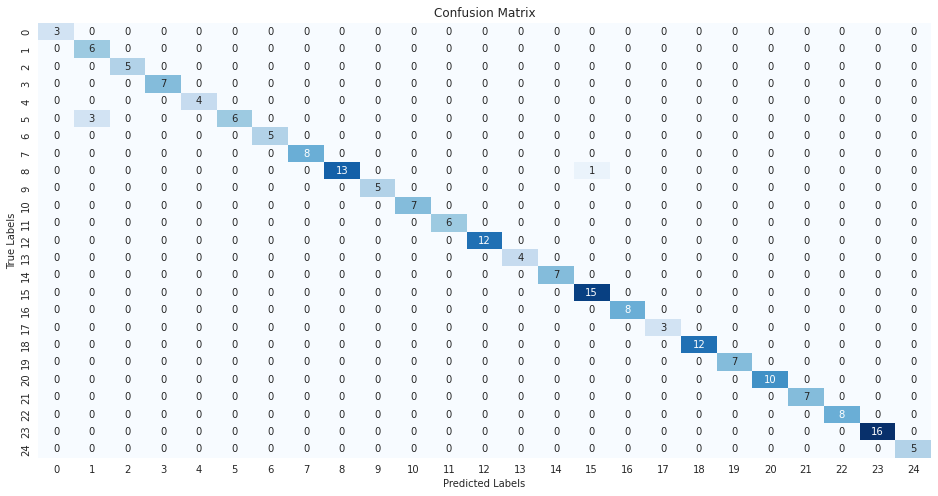

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Actualsutable roles predictions for CVs

In [57]:
!pip install PyPDF2

In [58]:
import PyPDF2

def extract_text_from_pdf(pdf_file_path):
    text = ""
    with open(pdf_file_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        num_pages = len(pdf_reader.pages)
        
        for page_num in range(num_pages):
            page = pdf_reader.pages[0]
            text += page.extract_text()
            
    return text

# Example usage:
pdf_file_path = "/kaggle/input/resumedata/resume_juanjosecarin.pdf"  # Update with your PDF file path
extracted_text = extract_text_from_pdf(pdf_file_path)


In [59]:
text =  preprocess_text(extracted_text)
text

'1 2 juan jose carin data scientist mountain view ca 94041 professional profile passionate abo ut data analysis experiments mainly focused user behavior experience engagement solid background data science statistics extensive experience using data insights drive business growth education 2016 university california berkeley master information data science gpa relevant courses machine learning machine learning scale storing retrieving data field experiments applied regression time series analysis exploring analyzing data data visualization communication research design applications data analysis 2014 universidad politécnica de madrid statistical computational information processing gpa relevant courses data mining multivariate analysis time series neural networks statistical learning regression prediction methods optimization techniques monte carlo techniques numerical methods finance stochastic models finance bayesian networks 2005 universidad politécnica de madrid telecommunication eng

In [60]:
import nltk

# Tokenize the text into sentences using nltk
sentences = nltk.sent_tokenize(text)

# Split the sentences into two lists
sentences_split = [sentences[:len(sentences)//1]]

# Print the split sentences
for i, sentence_list in enumerate(sentences_split, start=1):
    print(f"Sentence list {i}: {sentence_list}")


Sentence list 1: ['1 2 juan jose carin data scientist mountain view ca 94041 professional profile passionate abo ut data analysis experiments mainly focused user behavior experience engagement solid background data science statistics extensive experience using data insights drive business growth education 2016 university california berkeley master information data science gpa relevant courses machine learning machine learning scale storing retrieving data field experiments applied regression time series analysis exploring analyzing data data visualization communication research design applications data analysis 2014 universidad politécnica de madrid statistical computational information processing gpa relevant courses data mining multivariate analysis time series neural networks statistical learning regression prediction methods optimization techniques monte carlo techniques numerical methods finance stochastic models finance bayesian networks 2005 universidad politécnica de madrid tel

In [61]:
# Preprocess the long text input
def preprocess_long_text(text):
    # Tokenization
    tokens = tokenizer.texts_to_sequences([text])
    
    # Pad the sequences to a fixed length
    padded_sequences = pad_sequences(tokens, maxlen=max_len)
    
    return padded_sequences

# Example of how to use the preprocess_long_text function
long_text_input = sentence_list[0]
preprocessed_input = preprocess_long_text(long_text_input)

# Predict the class probabilities for the preprocessed input
predicted_probabilities = model.predict(preprocessed_input)

# Get the predicted class label
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_label = label_encoder.classes_[predicted_class_index]

print("Predicted Class:", predicted_class_label)


Predicted Class: 9


In [62]:
# Function to decode an encoded number
def decode(encoded_num):
    return encoded_to_category.get(encoded_num, "Unknown")

# Example usage
encoded_num = predicted_class_label # Example encoded number
decoded_value = decode(encoded_num)
print("Your CV information suggest that this CV is mainly sutable for applying :", decoded_value,"Role. If it does not match with your expected role, I higly suggest that you should chnage your CV carefully and reupload to verification")


Your CV information suggest that this CV is mainly sutable for applying : DotNet Developer Role. If it does not match with your expected role, I higly suggest that you should chnage your CV carefully and reupload to verification


### Save the model and vectorizor

In [63]:
# Specify the path where you want to save the model
model_path = 'model.h5'

# Save the model
model.save(model_path)

print("Model saved successfully.")


Model saved successfully.


In [64]:
import pickle

# Specify the path where you want to save the tokenizer
tokenizer_path = 'tokenizer.pkl'

# Save the tokenizer as a pickle file
with open(tokenizer_path, 'wb') as file:
    pickle.dump(tokenizer, file)

print("Tokenizer saved successfully.")


Tokenizer saved successfully.
